load packages

In [1]:
import numpy as np
import pandas as pd

from sklearn import svm, model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

load and split kaggle training data

In [2]:
df = pd.read_csv('data/train.csv')
#arr = df.values

X = df.loc[:, df.columns != 'label'].as_matrix().astype('uint8')
Y = df.label.as_matrix().tolist()

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25)

visualize first entry

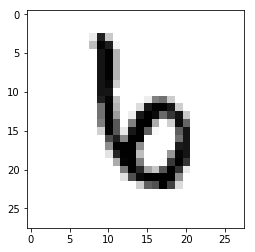

6

In [3]:
plt.imshow(X_train[0].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

Y_train[0]

train a linear support vector classifier and predict the labels of the test set

In [4]:
clf = svm.LinearSVC()
clf.fit(X_train, Y_train)

predicted = clf.predict(X_test)
#sorted(clf.cv_results_.keys())

In [7]:
print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(Y_test, predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(Y_test, predicted))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1039
          1       0.93      0.93      0.93      1187
          2       0.90      0.78      0.84      1037
          3       0.83      0.87      0.85      1088
          4       0.64      0.95      0.76      1021
          5       0.93      0.60      0.73       951
          6       0.91      0.93      0.92      1063
          7       0.89      0.89      0.89      1106
          8       0.70      0.87      0.78       963
          9       0.88      0.55      0.68      1045

avg / total       0.86      0.84      0.84     10500


Confusion matrix:
[[1004    2    1    7    4    2    9    2    7    1]
 [   1 1108    9    1    5    2    3

In [8]:
#print(svc.coef_)
#print(svc.intercept_)
print("Score: %s" % clf.score(X_test, Y_test))

Score: 0.838761904762


save the model for later use

In [9]:
joblib.dump(clf, 'mnist.model.sav')

['mnist.model.sav']

retrain the model by tuning the parameters

In [10]:
Cs = np.logspace(-6, -1, 10)
clf = model_selection.GridSearchCV(estimator=svm.LinearSVC(), param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(X_train, Y_train)
print(clf.best_score_)
print(clf.best_estimator_.C)

print("Score: %s" % clf.score(X_test, Y_test))

0.90546031746
1e-06
Score: 0.908285714286


In [11]:
predicted = clf.predict(X_test)

print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(Y_test, predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(Y_test, predicted))

Classification report for classifier GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0):
             precision    recall  f1-score   support

          0       0.94      0.97      0.96      1039
          1       0.94      0.97      0.95      1187
          2       0.92      0.88      0.90      1037
          3       0.89      0.89      0.89      1088
          4       0.93      0.92      0.92      1021
          5       0.9

save the tuned model

In [12]:
joblib.dump(clf, 'mnist.tunedmodel.sav')

['mnist.tunedmodel.sav']

train a model using random forest classifier

In [14]:
rfc = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_features='sqrt', oob_score=True)
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
clf = model_selection.GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
clf.fit(X_train, Y_train)
print(clf.best_params_)

clf.fit(X_train,Y_train)

print("Score: %s" % clf.score(X_test, Y_test))

{'max_features': 'sqrt', 'n_estimators': 700}
Score: 0.96780952381


In [15]:
predicted = clf.predict(X_test)

print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(Y_test, predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(Y_test, predicted))

Classification report for classifier GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0):
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1039
          1       0.98      0.98      0.98      1187
          2       0.95      0.97      0.96      1037
          3       0.96      0.95      0.95   

In [16]:
joblib.dump(clf, 'mnist.randomforestmodel.sav')

['mnist.randomforestmodel.sav']

load the trained model and the kaggle sample set then visualize the first entry

In [17]:
clf2 = joblib.load('mnist.randomforestmodel.sav')

df = pd.read_csv('data/test.csv')
X_sample = df.values

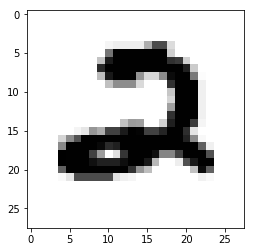

In [18]:
plt.imshow(X_sample[0].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

predict the labels for the kaggle sample set

In [19]:
Y_sample = clf2.predict(X_sample)
Y_sample

array([2, 0, 9, ..., 3, 9, 2])

structure kaggle submission according to requirements

In [20]:
index = [i for i in range(1, len(Y_sample)+1)]
index
df = pd.DataFrame(Y_sample, index=index, columns=["Label"])
df.index.name = "ImageId"

df.to_csv('data/result.csv')